In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_airbnb = pd.read_csv('data/AB_NYC_2019.csv')
df_airbnb.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
40239,31209182,LIC Spacious Bedroom in Luxury Building,131782045,Rylan,Queens,Long Island City,40.74946,-73.93854,Private room,60,5,0,NaN,NaN,1,0
9944,7652877,Suite in The Upper East Side,40163236,Manuela,Manhattan,Upper East Side,40.77018,-73.95947,Entire home/apt,205,2,23,2017-01-05,0.61,1,0
36525,29037588,Spacious Apartment Located By Central Park,212697613,Jon,Manhattan,Upper West Side,40.78857,-73.97072,Entire home/apt,295,3,19,2019-06-18,2.16,1,77
18850,14959966,2 Bedroom in Convenient Upper East Apartment,7903711,Abby,Manhattan,Upper East Side,40.77979,-73.95379,Entire home/apt,260,2,8,2018-05-23,0.23,1,0
38794,30394018,"Sleek Wall St. 1BR w/ Lux gym, Doorman, + Roof...",107434423,Blueground,Manhattan,Financial District,40.70513,-74.00900,Entire home/apt,271,30,0,NaN,NaN,232,234


## Data Imputation - Null Values

In [79]:
df_airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [80]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [81]:
df_airbnb.shape

(48895, 16)

In [82]:
df_airbnb.dropna(axis=0, subset=['name', 'host_name'], inplace=True)
df_airbnb.shape

(48858, 16)

In [83]:
df_airbnb.drop(columns='last_review', axis=1, inplace=True)
df_airbnb.shape

(48858, 15)

In [84]:
df_airbnb_numeric = df_airbnb.select_dtypes(include=np.number)
df_airbnb_categorical = df_airbnb.select_dtypes(exclude=np.number)

In [85]:
df_airbnb_numeric.sample(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6807,4867504,10387090,40.68150,-73.91267,42,30,3,0.05,5,348
1065,448049,1267021,40.74906,-73.89377,69,7,55,0.64,3,318


In [86]:
df_airbnb_categorical.sample(2)

,name,host_name,neighbourhood_group,neighbourhood,room_type
45933,Sonder | 116 John | Quaint Studio + Gym,Sonder (NYC),Manhattan,Financial District,Entire home/apt
12024,Light and airy 2 bedroom apartment.,Ayanna,Brooklyn,Clinton Hill,Entire home/apt


In [87]:
import sklearn.impute as impute

In [88]:
impu = impute.KNNImputer()
data2 = impu.fit_transform(df_airbnb_numeric)
df_airbnb_numeric = pd.DataFrame(data=data2, columns=df_airbnb_numeric.columns, index=df_airbnb_numeric.index)

In [89]:
df_airbnb_numeric.isna().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [90]:
df_airbnb_numeric.sample(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
40757,31647516.0,237204047.0,40.72963,-74.00330,250.0,2.0,11.0,2.34,1.0,0.0
48815,36446514.0,274025920.0,40.66921,-73.93521,59.0,2.0,0.0,1.40,1.0,16.0


In [22]:
df_airbnb = pd.concat([df_airbnb_numeric, df_airbnb_categorical], axis=1)
df_airbnb.shape

(48858, 15)

In [91]:
df_airbnb.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
22240,17929219,HEART of West Village! Big + Beautiful TRUE 1 ...,28588488,Cannon,Manhattan,West Village,40.73612,-73.99978,Entire home/apt,395,1,39,1.43,1,177
7988,6145637,SPACE IN APT IN PERFECT LOCATION,9532490,Alexandra,Manhattan,East Village,40.73065,-73.98899,Shared room,77,2,57,1.13,3,311


In [92]:
df_airbnb_numeric = df_airbnb.select_dtypes(include=np.number)
df_airbnb_categorical = df_airbnb.select_dtypes(exclude=np.number)

In [93]:
df_airbnb_categorical.shape

(48858, 5)

## Outlier Treatment

In [94]:
# plt.rcParams['figure.figsize'] = (30, 20)
# for i in range(len(df_airbnb_categorical.columns)):
#     plt.subplot(3, 3, i+1)
#     sns.countplot(data=df_airbnb_categorical, x=df_airbnb_categorical.columns[i], 
#                  dodge=True)
# #     plt.tight_layout()
#     plt.show()

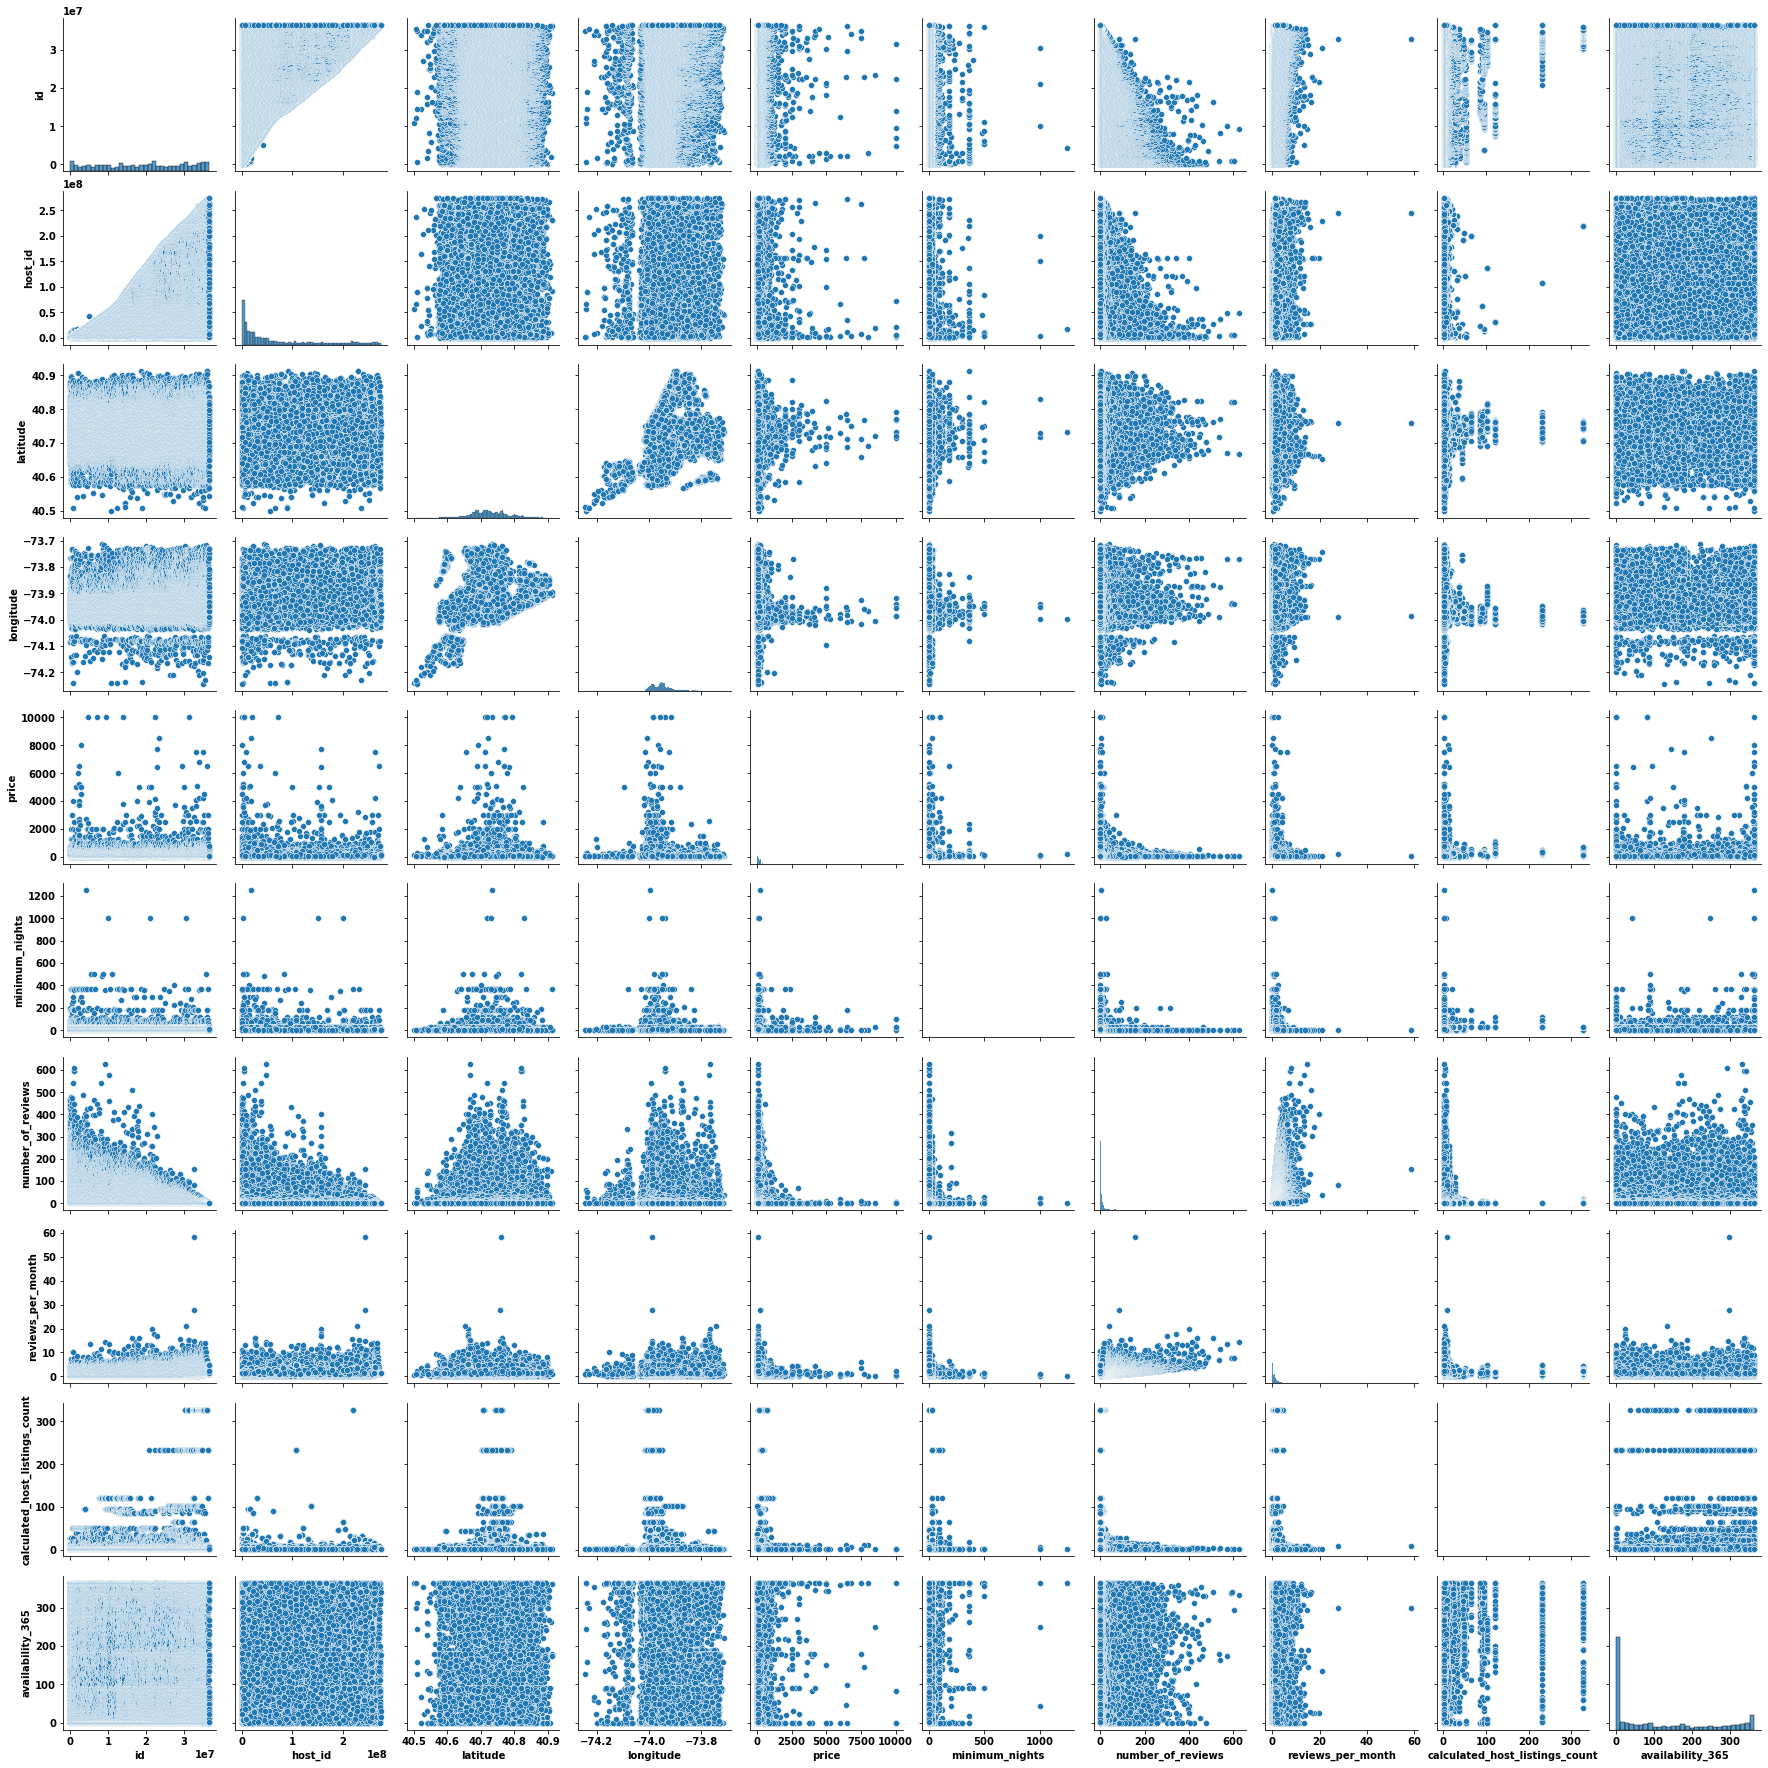

In [31]:
sns.pairplot(data=df_airbnb_numeric)

In [95]:
for col in df_airbnb_categorical.columns:
    print(col,' :\n', df_airbnb_categorical[col].value_counts(), '\n\n')

name  :
 Hillside Hotel                                   18
Home away from home                              17
New york Multi-unit building                     16
Brooklyn Apartment                               12
Private Room                                     11
                                                 ..
Studio loft - Williamsburg/Bushwick               1
❤️ of Wburg, Private Living+Entrance              1
Spacious Home - 10 minutes from Central Park      1
Pet-friendly 1bd in the Heart of East Village     1
UES studio walking distance to central park       1
Name: name, Length: 47884, dtype: int64 


host_name  :
 Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
               ... 
Maireni           1
Neev              1
Anne A            1
Guilherme         1
Miraya            1
Name: host_name, Length: 11450, dtype: int64 


neighbourhood_group  :
 Manhattan        21643
Brooklyn         20089
Queens            5664
B

## Correlation Check

In [96]:
corr_data = df_airbnb_numeric.corr()
corr_data

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.291786,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.296274,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.010117,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.146228,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.030623,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.121712,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.549699,-0.072408,0.171855
reviews_per_month,0.291786,0.296274,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.009442,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.185896,0.225784,1.000000


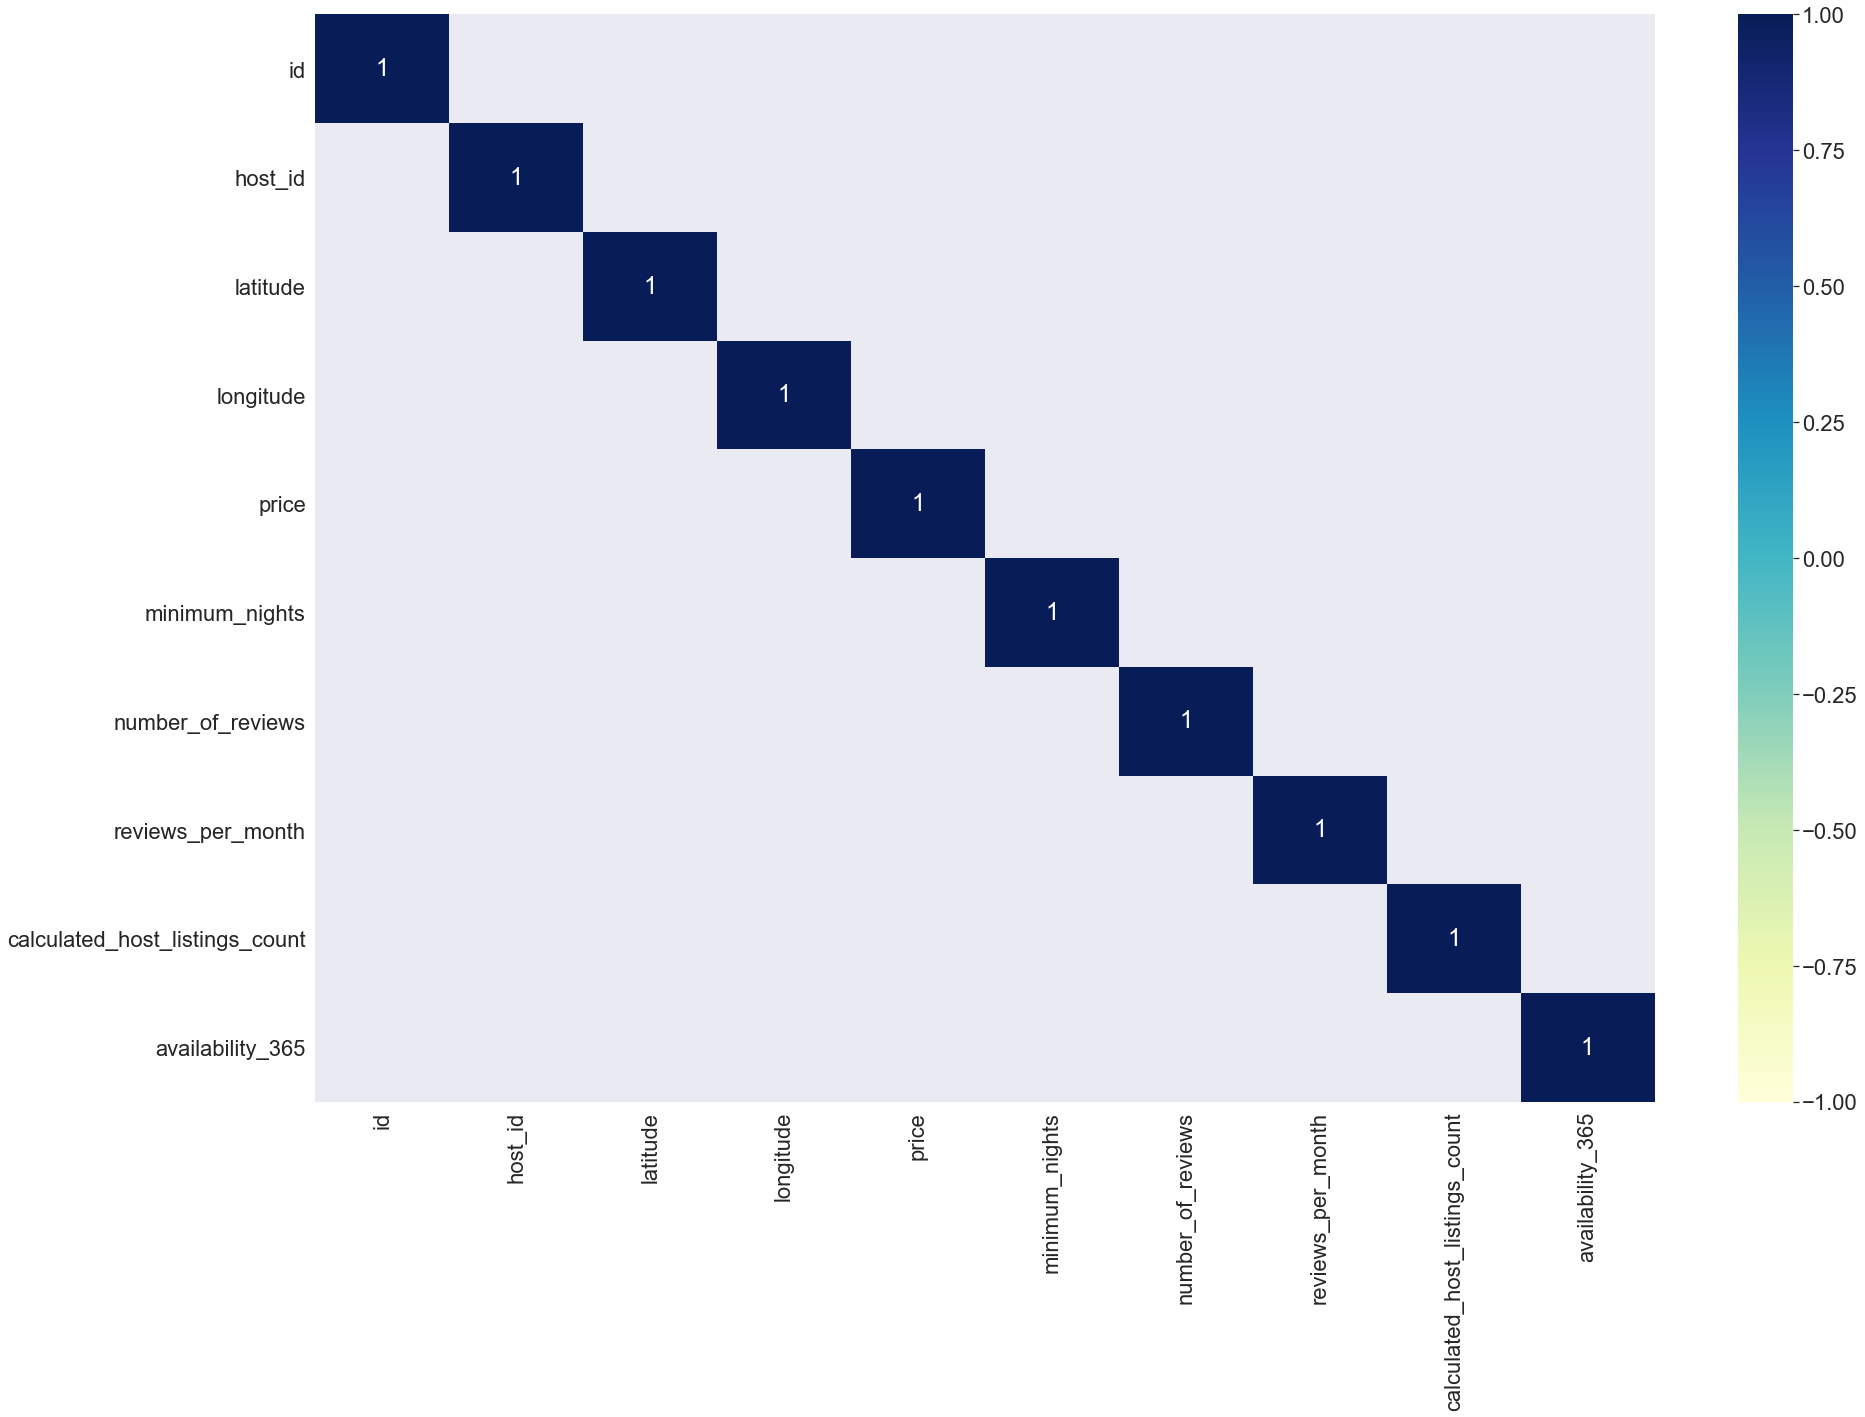

In [97]:
sns.set(font_scale=2.0)
sns.heatmap(data=corr_data[(corr_data>=0.7) | (corr_data<=-.7)], 
           vmax=1.0, vmin=-1.0,
           cmap='YlGnBu', 
           annot=True)
plt.show()

## Normality Check of Output data

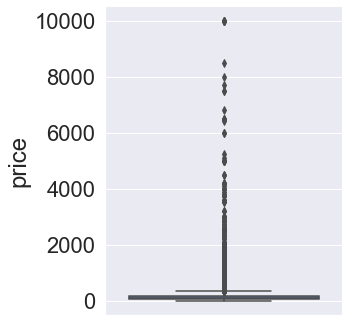

In [98]:
# Check the normality of price
sns.catplot(kind='box', data=df_airbnb, y='price')
plt.show()

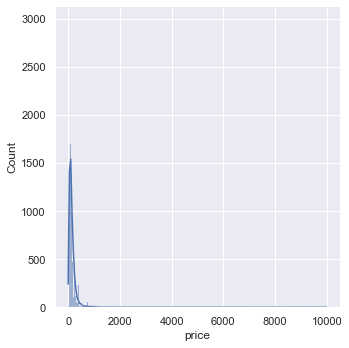

In [99]:
sns.set(font_scale=1)
sns.displot(data=df_airbnb, x='price', kind='hist', kde=True)
sns.set_style(style='whitegrid')
plt.show()

In [100]:
df_airbnb['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [101]:
df_airbnb[df_airbnb['price']==0].shape

(11, 15)

In [102]:
df_airbnb['price'].quantile(.01)

30.0

In [103]:
df_airbnb['price']= np.where(df_airbnb['price']==0, 
                             df_airbnb['price'].quantile(.01), 
                             df_airbnb['price'])

In [104]:
df_airbnb['price'].describe()

count    48858.000000
mean       152.747063
std        240.228513
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [105]:
# Lets perform Shapiro test
import scipy as scipy


In [106]:
stat, p_value = scipy.stats.shapiro(df_airbnb['price'])
alpha = 0.05
if p_value < alpha:
    print('The data is not normally distributed (reject H0)')
else:
    print('The data is normally distributed (fail to reject H0)')

The data is not normally distributed (reject H0)


C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Perform Log Transformation

In [107]:
df_airbnb['log_price'] = np.log(df_airbnb['price'])
df_airbnb[['log_price', 'price']]

,log_price,price
0,5.003946,149.0
1,5.416100,225.0
2,5.010635,150.0
3,4.488636,89.0
4,4.382027,80.0
...,...,...
48890,4.248495,70.0
48891,3.688879,40.0
48892,4.744932,115.0
48893,4.007333,55.0


In [108]:
# Perform Shapiro again

stat, p_value = scipy.stats.shapiro(df_airbnb['log_price'])
alpha = 0.05
if p_value < alpha:
    print('The data is not normally distributed (reject H0)')
else:
    print('The data is normally distributed (fail to reject H0)')

The data is not normally distributed (reject H0)


C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


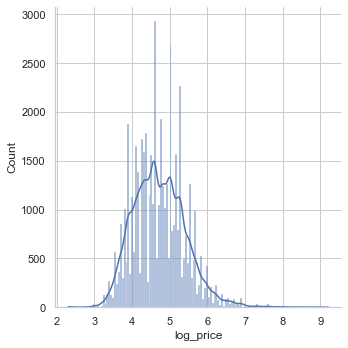

In [109]:
sns.displot(df_airbnb['log_price'], kind='hist', kde=True)
plt.show()


## Encoding of Categorical Columns

In [110]:
# Price shall not depend on these features so dropping them
df_airbnb.drop(columns=['name', 'host_name'], axis=1, inplace=True)

In [111]:
df_airbnb_numeric = df_airbnb.select_dtypes(include=np.number)
df_airbnb_categorical = df_airbnb.select_dtypes(exclude=np.number)

In [112]:
for col in df_airbnb_categorical.columns:
    df_temp_dummy = pd.get_dummies(data=df_airbnb_categorical[col],
                                  prefix=col, drop_first=True)
    df_airbnb_categorical = pd.concat([df_airbnb_categorical, df_temp_dummy],
                                     axis=1)
    df_airbnb_categorical.drop(columns=col, axis=1, inplace=True)

In [113]:
df_airbnb_categorical.shape

(48858, 226)

In [71]:
df_airbnb_categorical.sample(2)

,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
30677,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14250,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df_airbnb = pd.concat([df_airbnb_numeric, df_airbnb_categorical], axis=1)
df_airbnb.shape

(48858, 237)

In [76]:
import statsmodels.api as api

In [116]:
df_airbnb = statsmodels.api.add_constant(df_airbnb)

## OLS Model (Linear Regression)

In [117]:
Y = df_airbnb[['log_price', 'price']]
X = df_airbnb.drop(['log_price', 'price'], axis=1)